In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
df_master = pd.read_pickle('GTD_df.p')

## Start with a simple model

In [3]:
row_mask = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features = ['iyear', 
            'imonth', 
            'multiple',
            'success',
            'suicide',
            'nkill',
            'nkillus',
            'nkillter',
            'nwound',
            'nwoundus',
            'nwoundte',
            'ishostkid',
            'property']
            
# Consider adding nperps and nperpcap but lots of nan values
# Features below need to be trasnformed into dummy matrix 
features_cat = ['country_txt', 
                'attacktype1_txt',
                'weaptype1_txt',
                'targtype1_txt',
                'natlty1_txt']

labels = ['gname']

In [4]:
df_master[labels + features + features_cat][row_mask].shape

(10382, 19)

In [5]:
df_master[labels + features + features_cat][row_mask].dropna().shape

(9139, 19)

In [6]:
df_m1 = pd.get_dummies(df_master[labels + features + features_cat][row_mask].dropna(), columns=features_cat)
df_m1 = df_m1[df_m1.groupby('gname')['gname'].transform(len) > 5]

In [7]:
df_m1.shape

(8556, 234)

In [8]:
X = df_m1.iloc[:,1:]
y = df_m1.iloc[:,0]

In [9]:
len(y.unique())

116

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
cm1 = RandomForestClassifier(n_estimators=25)
cm1.fit(X_train, y_train)
print('Train Accuracy:', cm1.score(X_train, y_train))
print('Test Accuracy:', cm1.score(X_test, y_test))
print(classification_report(y_test, cm1.predict(X_test)))

Train Accuracy: 0.995636590306997
Test Accuracy: 0.7980364656381487
                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       0.50      0.33      0.40         3
                                      Abu Sayyaf Group (ASG)       0.25      0.22      0.24         9
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00         2
                                                  Ajnad Misr       0.00      0.00      0.00         0
                                     Al-Aqsa Martyrs Brigade       0.00      0.00      0.00         5
                                                    Al-Fatah       0.00      0.00      0.00         0
                                       Al-Naqshabandiya Army       0.50      1.00      0.67         1
                                             Al-Nusrah Front       0.90      0.53      0.67        17
             

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [13]:
pd.DataFrame(cm1.feature_importances_, X.columns, columns=['Coefs']).sort_values(by='Coefs', ascending = False)

,Coefs
natlty1_txt_Afghanistan,0.096840
iyear,0.092881
country_txt_Afghanistan,0.083736
imonth,0.062988
country_txt_Iraq,0.043061
nkill,0.042937
nwound,0.042242
natlty1_txt_Iraq,0.030444
country_txt_Somalia,0.028403
natlty1_txt_Nigeria,0.023741


In [14]:
pd.DataFrame(y_test[cm1.predict(X_test)=='Al-Fatah'])

,gname
83355,Hamas (Islamic Resistance Movement)
74446,Al-Aqsa Martyrs Brigade


In [15]:
## Master Pipeline
row_mask2 = (#(df_master['region_txt'] == 'Middle East & North Africa') &
            (df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features2 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             #'nwoundus',
             'nwoundte',
             'ishostkid',
             'property',
             'nperps',
             'nperpcap']
            

# Features below need to be trasnformed into dummy matrix 
features_cat2 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 #'weapsubtype1_txt',
                 'targtype1_txt',
                 #'targsubtype1_txt',
                 'natlty1_txt']

labels2 = ['gname']

#subset on mask and features
df_m2 = pd.get_dummies(df_master[labels2 + features2 + features_cat2][row_mask2].dropna(), columns=features_cat2)
#subset number of attack per group
df_m2 = df_m2[df_m2.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X2 = df_m2.iloc[:,1:]
y2 = df_m2.iloc[:,0]

#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.25, random_state=42)

#fit Model
cm2 = RandomForestClassifier(n_estimators=100)
cm2.fit(X2_train, y2_train)

#report
print('Number of Attacks:', df_m2.shape[0])
print('Number of Features:', df_m2.shape[1])
print('Number of Groups:', len(y2.unique()))
print('Train Accuracy:', cm2.score(X2_train, y2_train))
print('Test Accuracy:', cm2.score(X2_test, y2_test))
print(classification_report(y2_test, cm2.predict(X2_test)))

Number of Attacks: 8174
Number of Features: 4112
Number of Groups: 106
Train Accuracy: 1.0
Test Accuracy: 0.8297455968688845
                                                            precision    recall  f1-score   support

                                   Abdullah Azzam Brigades       1.00      0.67      0.80         3
                                    Abu Sayyaf Group (ASG)       0.50      0.25      0.33         8
                  Adan-Abyan Province of the Islamic State       0.00      0.00      0.00         2
                                                Ajnad Misr       1.00      0.50      0.67         2
                                   Al-Aqsa Martyrs Brigade       0.67      0.20      0.31        10
                                     Al-Naqshabandiya Army       0.00      0.00      0.00         3
                                           Al-Nusrah Front       0.80      0.47      0.59        17
                                          Al-Qaida in Iraq       0.96     

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [16]:
pd.DataFrame(cm2.feature_importances_, X2.columns, columns=['Coefs']).sort_values(by='Coefs', ascending = False)

,Coefs
country_txt_Afghanistan,0.070111
natlty1_txt_Afghanistan,0.070028
iyear,0.045529
iday,0.033241
natlty1_txt_Iraq,0.032676
country_txt_Iraq,0.030864
imonth,0.030655
nkill,0.026193
nwound,0.025073
natlty1_txt_Nigeria,0.019737


In [19]:
test_group = 'Al-Qaida in Iraq'
pd.DataFrame(cm2.predict(X2_test)[y2_test == test_group][0], y2_test[y2_test == test_group], columns=['predictions'])

,predictions
gname,
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq
Al-Qaida in Iraq,Al-Qaida in Iraq


/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do no

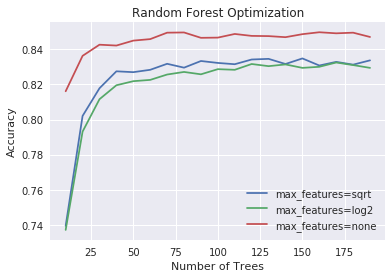

In [20]:
sqrt = []
log2 = []
none = []
n_range = range(10,200,10)

for n in n_range:
    cm_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', oob_score=True, n_jobs=-1)
    cm_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', oob_score=True, n_jobs=-1)
    cm_none = RandomForestClassifier(n_estimators=n, max_features=None, oob_score=True, n_jobs=-1)
    cm_sqrt.fit(X2, y2)
    cm_log2.fit(X2, y2)
    cm_none.fit(X2, y2)
    sqrt.append(cm_sqrt.oob_score_)
    log2.append(cm_log2.oob_score_)
    none.append(cm_none.oob_score_)

plt.plot(n_range, sqrt, label='max_features=sqrt')
plt.plot(n_range, log2, label='max_features=log2')
plt.plot(n_range, none, label='max_features=none')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

In [21]:
#optimizing the model
row_mask3 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features3 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property',]
            

# Features below need to be trasnformed into dummy matrix 
features_cat3 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels3 = ['gname']

#subset on mask and features
df_m3 = pd.get_dummies(df_master[labels3 + features3 + features_cat3][row_mask3].dropna(), columns=features_cat3)
#subset number of attack per group
df_m3 = df_m3[df_m3.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X3 = df_m3.iloc[:,1:]
y3 = df_m3.iloc[:,0]

#fit Model
cm3 = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score=True, n_jobs=-1, max_features=None,)
cm3.fit(X3, y3)

#report
print('Number of Attacks:', df_m3.shape[0])
print('Number of Features:', df_m3.shape[1])
print('Number of Groups:', len(y3.unique()))
print('Train Accuracy:', cm3.score(X3, y3))
print('OOB Accuracy:', cm3.oob_score_)

Number of Attacks: 8574
Number of Features: 4319
Number of Groups: 117
Train Accuracy: 0.9998833683228365
OOB Accuracy: 0.8379986004198741


/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do no

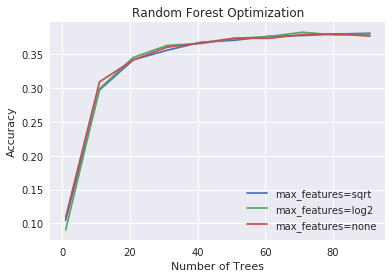

In [22]:
#let's take a look at what happens to accuracy when we drop categorcials
row_mask4 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features4 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

labels4 = ['gname']

#subset on mask and features
df_m4 = df_master[labels4 + features4][row_mask4].dropna()
#subset number of attack per group
df_m4 = df_m4[df_m4.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X4 = df_m4.iloc[:,1:]
y4 = df_m4.iloc[:,0]

#plot
sqrt = []
log2 = []
none = []
n_range = range(1,100,10)

for n in n_range:
    cm_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', oob_score=True, n_jobs=-1)
    cm_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', oob_score=True, n_jobs=-1)
    cm_none = RandomForestClassifier(n_estimators=n, max_features=None, oob_score=True, n_jobs=-1)
    cm_sqrt.fit(X4, y4)
    cm_log2.fit(X4, y4)
    cm_none.fit(X4, y4)
    sqrt.append(cm_sqrt.oob_score_)
    log2.append(cm_log2.oob_score_)
    none.append(cm_none.oob_score_)

plt.plot(n_range, sqrt, label='max_features=sqrt')
plt.plot(n_range, log2, label='max_features=log2')
plt.plot(n_range, none, label='max_features=none')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do no

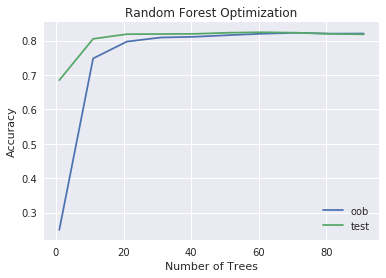

In [23]:
# Investigating OOB
#optimizing the model on what we've learned so far.
row_mask5 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features5 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat5 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels5 = ['gname']

#subset on mask and features
df_m5 = pd.get_dummies(df_master[labels5 + features5 + features_cat5][row_mask5].dropna(), columns=features_cat5)
#subset number of attack per group
df_m5 = df_m5[df_m5.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X5 = df_m5.iloc[:,1:]
y5 = df_m5.iloc[:,0]

#train test split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=.25, random_state=42)

#plot
oob = []
test = []
n_range = range(1,100,10)

for n in n_range:
    cm_test = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    cm_oob = RandomForestClassifier(n_estimators=n, oob_score=True, n_jobs=-1)
    cm_test.fit(X5_train, y5_train)
    cm_oob.fit(X5, y5)
    test.append(cm_test.score(X5_test, y5_test))
    oob.append(cm_oob.oob_score_)

plt.plot(n_range, oob, label='oob')
plt.plot(n_range, test, label='test')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

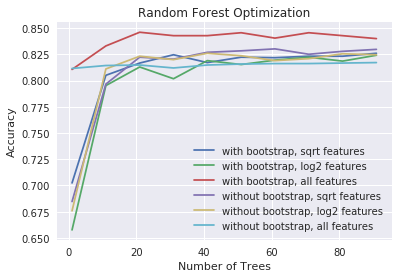

In [24]:
# Investigating bootstrapping
row_mask6 = (#(df_master['region_txt'] == 'Middle East & North Africa') &
            (df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features6 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat6 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels6 = ['gname']

#subset on mask and features
df_m6 = pd.get_dummies(df_master[labels6 + features6 + features_cat6][row_mask6].dropna(), columns=features_cat6)
#subset number of attack per group
df_m6 = df_m6[df_m6.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X6 = df_m6.iloc[:,1:]
y6 = df_m6.iloc[:,0]

#train test split
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=.25, random_state=42)

#plot
boot_sqrt = []
boot_log2 = []
boot_none = []
noboot_sqrt = []
noboot_log2 = []
noboot_none = []
n_range = range(1,100,10)

for n in n_range:
    cm_boot_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', n_jobs=-1, bootstrap=True)
    cm_boot_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', n_jobs=-1, bootstrap=True)
    cm_boot_none = RandomForestClassifier(n_estimators=n, max_features= None, n_jobs=-1, bootstrap=True)
    cm_noboot_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', n_jobs=-1, bootstrap=False)
    cm_noboot_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', n_jobs=-1, bootstrap=False)
    cm_noboot_none = RandomForestClassifier(n_estimators=n, max_features= None, n_jobs=-1, bootstrap=False)
    
    cm_boot_sqrt.fit(X6_train, y6_train)
    cm_boot_log2.fit(X6_train, y6_train)
    cm_boot_none.fit(X6_train, y6_train)
    cm_noboot_sqrt.fit(X6_train, y6_train)
    cm_noboot_log2.fit(X6_train, y6_train)
    cm_noboot_none.fit(X6_train, y6_train)
    
    boot_sqrt.append(cm_boot_sqrt.score(X6_test, y6_test))
    boot_log2.append(cm_boot_log2.score(X6_test, y6_test))
    boot_none.append(cm_boot_none.score(X6_test, y6_test))
    noboot_sqrt.append(cm_noboot_sqrt.score(X6_test, y6_test))
    noboot_log2.append(cm_noboot_log2.score(X6_test, y6_test))
    noboot_none.append(cm_noboot_none.score(X6_test, y6_test))

plt.plot(n_range, boot_sqrt, label='with bootstrap, sqrt features')
plt.plot(n_range, boot_log2, label='with bootstrap, log2 features')
plt.plot(n_range, boot_none, label='with bootstrap, all features')
plt.plot(n_range, noboot_sqrt, label='without bootstrap, sqrt features')
plt.plot(n_range, noboot_log2, label='without bootstrap, log2 features')
plt.plot(n_range, noboot_none, label='without bootstrap, all features')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

My random forest does not want to be a decision tree. Run cross val to mitigate variance in the all features model

In [45]:
# trying Logistic Regression



row_mask7 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features7 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat7 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels7 = ['gname']

#subset on mask and features
df_m7 = pd.get_dummies(df_master[labels7 + features7 + features_cat7][row_mask7].dropna(), columns=features_cat7)
#subset number of attack per group
df_m7 = df_m7[df_m7.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X7 = scale(df_m7.iloc[:,1:])
y7 = df_m7.iloc[:,0]

#train test split
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=.25, random_state=42)


# fit model and score
lr = LogisticRegression(n_jobs=16)
lr.fit(X7_train, y7_train)
print('Train:', lr.score(X7_train, y7_train))
print('Accuracy:', lr.score(X7_test, y7_test))


/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(self.n_jobs))


Train: 0.9636080870917574
Accuracy: 0.7826492537313433


In [114]:
print(classification_report(y7_test, lr.predict(X7_test)))

                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       1.00      1.00      1.00         1
                                      Abu Sayyaf Group (ASG)       1.00      0.40      0.57        10
                                                  Ajnad Misr       0.33      1.00      0.50         1
                                     Al-Aqsa Martyrs Brigade       0.54      0.41      0.47        17
                                                    Al-Fatah       0.00      0.00      0.00         2
                                       Al-Naqshabandiya Army       0.00      0.00      0.00         2
                                             Al-Nusrah Front       0.40      0.67      0.50         9
                                            Al-Qaida in Iraq       0.71      0.55      0.62        66
                    Al-Qaida in the Arabian Peninsula (AQAP)       0.77      0.87

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This looks fairly overfit. Might need some regularization. Lets tune the C

In [52]:
#Grid Searching lr for best C
row_mask7 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features7 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat7 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels7 = ['gname']

#subset on mask and features
df_m7 = pd.get_dummies(df_master[labels7 + features7 + features_cat7][row_mask7].dropna(), columns=features_cat7)
#subset number of attack per group
df_m7 = df_m7[df_m7.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X7 = scale(df_m7.iloc[:,1:])
y7 = df_m7.iloc[:,0]

#train test split
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=.25, random_state=42)


#fit grid
grid = GridSearchCV(LogisticRegression(penalty='l2', n_jobs=-1), {'C' : np.linspace(1e-4,1e-1, 50)}, scoring='accuracy', n_jobs=-1)
grid.fit(X7,y7)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228:

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228:

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228:

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228:

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228:

0.751924422673198
{'C': 0.008255102040816326}
LogisticRegression(C=0.008255102040816326, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [53]:
grid.cv_results_

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/malik/anaconda3/lib/python3.5/

{'mean_fit_time': array([ 489.86297464, 1043.43730919, 1186.18317556, 1307.36381547,
        1383.38311871, 1447.10894569, 1491.6783394 , 1542.80548151,
        1570.33157261, 1607.84642132, 1648.25104101, 1673.92677855,
        1702.48683222, 1727.3360947 , 1747.73719033, 1772.0755868 ,
        1781.50517734, 1817.4470013 , 1837.16420221, 1862.29703228,
        1873.25189201, 1881.66418584, 1891.82933521, 1918.45769668,
        1940.97215962, 1948.09943255, 1945.46772504, 1966.62524907,
        1976.50733081, 1992.57038665, 2011.10820977, 2019.5199302 ,
        2012.39422814, 2020.82044387, 2038.80286201, 2039.10077024,
        2059.77204116, 2050.13921269, 2070.99934975, 2068.51801149,
        2088.37288014, 2090.26219058, 2088.46082274, 2105.84241414,
        2106.22811977, 2094.28762984, 2059.52680286, 1990.73367405,
        1674.9285748 , 1165.44451372]),
 'mean_score_time': array([0.20594486, 0.19110862, 0.17815765, 0.17114019, 0.18527206,
        0.1833446 , 0.18393175, 0.159148

In [54]:
# trying Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

row_mask8 = ((df_master['iyear'] > 2001) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types 
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features8 = ['iyear', 
             'imonth',
             'iday',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat8 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels8 = ['gname']

#subset on mask and features
df_m8 = pd.get_dummies(df_master[labels8 + features8 + features_cat8][row_mask8].dropna(), columns=features_cat8)
#subset number of attack per group
df_m8 = df_m8[df_m8.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X8 = df_m8.iloc[:,1:]
y8 = df_m8.iloc[:,0]

#train test split
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=.25, random_state=42)


# fit model and score
nb_B = BernoulliNB()
nb_M = MultinomialNB()
nb_G = GaussianNB()
nb_B.fit(X8_train, y8_train)
nb_M.fit(X8_train, y8_train)
nb_G.fit(X8_train, y8_train)
print('Bernoulli NB:', nb_B.score(X8_test, y8_test))
print('Multinomial NB:', nb_M.score(X8_test, y8_test))
print('Gaussian NB:', nb_G.score(X8_test, y8_test))

Bernoulli NB: 0.5680970149253731
Multinomial NB: 0.49673507462686567
Gaussian NB: 0.4780783582089552


In [115]:
print(classification_report(y8_test, nb_B.predict(X8_test)))

                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       0.00      0.00      0.00         1
                                      Abu Sayyaf Group (ASG)       0.00      0.00      0.00        10
                                                  Ajnad Misr       0.00      0.00      0.00         1
                                     Al-Aqsa Martyrs Brigade       0.00      0.00      0.00        17
                                                    Al-Fatah       0.00      0.00      0.00         2
                                       Al-Naqshabandiya Army       0.00      0.00      0.00         2
                                             Al-Nusrah Front       0.00      0.00      0.00         9
                                            Al-Qaida in Iraq       0.00      0.00      0.00        66
                    Al-Qaida in the Arabian Peninsula (AQAP)       0.00      0.00

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
# Grid Search

#build parameter grid
n_estimators_range = list(range(10,200,10))
max_features_options = ['sqrt', 'log2', None]
min_samples_split_range = list(range(2,50,5))
min_impurity_decrease_range = list(np.linspace(0.001,.01,10))

param_grid = dict(n_estimators = n_estimators_range,
                  max_features = max_features_options,
                  min_samples_split = min_samples_split_range, 
                  min_impurity_decrease = min_impurity_decrease_range)

#fit grid
rf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X9,y9)

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

0.7074468085106383
{'n_estimators': 20, 'min_samples_split': 17, 'min_impurity_decrease': 0.003, 'max_features': None}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.003, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=17,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [113]:
# Tuning Random Forest
row_mask9 = ((df_master['iyear'] > 2000) &     # focus on after 2001
            (df_master['doubtterr'] == 0) &   # exclude any doubt on terror
            (df_master['nkill'] > 0) &        # focus on attacks with victims
            (df_master['attacktype1'] != 9) & # exclude unknown attack types  
            (df_master['weaptype1'] != 13) &  # exclude unknown weapons
            (df_master['targtype1'] != 20) &  # exclude unknown targets
            (df_master['gname'] != 'Unknown') &  # exclude unknown perpetrators
            (df_master['guncertain1'] != 1) &  # exclude uncertainty in attribution
            (df_master['individual'] != 1) &  # unaffiliated individuals
            (df_master['property'] != -9) &  # unknown property damage
            (df_master['ishostkid'] != -9))  # unkown hostage situation
           
features9 = ['iyear', 
             'imonth',
             'multiple',
             'success',
             'suicide',
             'nkill',
             'nkillus',
             'nkillter',
             'nwound',
             'nwoundte',
             'ishostkid',
             'property']
            

# Features below need to be trasnformed into dummy matrix 
features_cat9 = ['country_txt',
                 'city',
                 'attacktype1_txt',
                 'weaptype1_txt',
                 'targtype1_txt',
                 'natlty1_txt']

labels9 = ['gname']

#subset on mask and features
df_m9 = pd.get_dummies(df_master[labels9 + features9 + features_cat9][row_mask9].dropna(), columns=features_cat9)
#subset number of attack per group
df_m9 = df_m9[df_m9.groupby('gname')['gname'].transform(len) > 5]

#define X and y
X9 = df_m9.iloc[:,1:]
y9 = df_m9.iloc[:,0]

#train test split
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=.25, stratify=df_m9['gname'])

#fit Model
cm9 = RandomForestClassifier(n_estimators=100, max_features= None,n_jobs=-1, class_weight='balanced')
cm9.fit(X9_train, y9_train)

# Cross Validation
cm9_cv = cross_val_score(RandomForestClassifier(n_estimators=100, min_samples_split=17, n_jobs=-1, class_weight='balanced'), X9, y9, n_jobs=-1, cv=4)

#report
print('Number of Attacks:', df_m9.shape[0])
print('Number of Features:', df_m9.shape[1])
print('Number of Groups:', len(y9.unique()))
print('Train Accuracy:', cm9.score(X9_train, y9_train))
print('Test Accuracy:', cm9.score(X9_test, y9_test))
print('Random Forest CV Accuracy:', cm9_cv.mean())
print('Random Forest Folds:', cm9_cv)
print(classification_report(y9_test, cm9.predict(X9_test)))

Number of Attacks: 8761
Number of Features: 4437
Number of Groups: 125
Train Accuracy: 0.9998477929984779
Test Accuracy: 0.8356914650844364
Random Forest CV Accuracy: 0.7099708119829418
Random Forest Folds: [0.64598214 0.76441217 0.73919043 0.69029851]
                                                              precision    recall  f1-score   support

                                     Abdullah Azzam Brigades       0.00      0.00      0.00         2
                                      Abu Sayyaf Group (ASG)       0.67      0.22      0.33         9
                    Adan-Abyan Province of the Islamic State       0.00      0.00      0.00         2
                                                  Ajnad Misr       0.00      0.00      0.00         1
                                     Al-Aqsa Martyrs Brigade       0.50      0.71      0.59        14
                                                    Al-Fatah       0.00      0.00      0.00         2
                                

/home/malik/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
pd.DataFrame(cm9.feature_importances_, X9.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending = False)

,Feature Importance
iyear,0.155302
imonth,0.068141
nwound,0.047876
nkill,0.043279
nkillter,0.014318
multiple,0.013669
targtype1_txt_Police,0.012938
targtype1_txt_Private Citizens & Property,0.012318
weaptype1_txt_Firearms,0.011699
attacktype1_txt_Armed Assault,0.011402


In [138]:
df_v = pd.DataFrame(
            {'gname': ['ISIL', 'Taliban', 'Misrata Militants', 'ISIL (suspected)', 'Al-Shabab (suspected)', 'Unknown', 'Unknown'],
             'iyear': [2017, 2017, 2017, 2017, 2017, 2017, 2017], 
             'imonth': [3, 4, 5, 11, 10, 10, 10],
             'multiple': [1, 0, 0, 0, 0, 0, 0],
             'success': [1, 1, 1, 1, 1, 1, 1],
             'suicide': [1, 1, 0, 0, 1, 1, 1],
             'nkill': [114, 140, 141, 311, 512, 50, 50],
             'nkillus': [0, 0, 0, 0, 0, 15, 15],
             'nkillter': [4, 10, 0, 0, 1, 3, 3],
             'nwound': [150, 160, 100, 122, 316, 100, 100],
             'nwoundte': [0, 0, 0, 0, 0, 0, 0],
             'ishostkid': [0, 0, 0, 0, 0, 0, 0],
             'property': [1, 1, 1, 1, 1, 1, 1],
             'country_txt': ['Syria', 'Afghanistan', 'Libya', 'Egypt', 'Somalia', 'United States', 'France'],
             'city': ['Damascus', 'Mazar-i-Sharif', 'Brak al-Shati', 'Al-Rawda', 'Mogadishu', 'New York City', 'Paris'],
             'attacktype1_txt': ['Bombing/Explosion', 'Armed Assault', 'Armed Assault', 'Armed Assault', 'Bombing/Explosion', 'Bombing/Explosion', 'Bombing/Explosion'],
             'weaptype1_txt': ['Explosives', 'Firearms', 'Firearms', 'Firearms', 'Explosives', 'Explosives', 'Explosives'],
             'targtype1_txt': ['Other', 'Military', 'Military', 'Religious Figures/Institutions', 'Private Citizens & Property', 'Private Citizens & Property', 'Private Citizens & Property'],
             'natlty1_txt': ['Iraq', 'Afghanistan', 'Libya', 'Egypt', 'Somalia','United States', 'France']},
              columns=labels9 + features9 + features_cat9)
df_v_pred = pd.get_dummies(df_v, columns=features_cat9)
df_v_pred = pd.DataFrame(df_v_pred, columns=df_m9.columns).fillna(0)

Xv = df_v_pred.iloc[:,1:]
yv = df_v_pred.iloc[:,0]

df_v['Prediction'] = cm9.predict(Xv)

In [ ]:
df_v

In [139]:
df_v[['gname','country_txt','city','nkill','attacktype1_txt', 'Prediction']]

,gname,country_txt,city,nkill,attacktype1_txt,Prediction
0,ISIL,Syria,Damascus,114,Bombing/Explosion,Islamic State of Iraq and the Levant (ISIL)
1,Taliban,Afghanistan,Mazar-i-Sharif,140,Armed Assault,Taliban
2,Misrata Militants,Libya,Brak al-Shati,141,Armed Assault,Tripoli Province of the Islamic State
3,ISIL (suspected),Egypt,Al-Rawda,311,Armed Assault,Sinai Province of the Islamic State
4,Al-Shabab (suspected),Somalia,Mogadishu,512,Bombing/Explosion,Al-Shabaab
5,Unknown,United States,New York City,50,Bombing/Explosion,Boko Haram
6,Unknown,France,Paris,50,Bombing/Explosion,Islamic State of Iraq and the Levant (ISIL)


In [65]:
pd.DataFrame(cm9.predict_proba(Xv),columns=cm9.classes_).T.sort_values(by=4,ascending=False)

,0,1,2,3,4
Al-Shabaab,0.03,0.00,0.00,0.00,0.99
Uighur Separatists,0.00,0.00,0.00,0.00,0.01
Abdullah Azzam Brigades,0.02,0.00,0.01,0.00,0.00
Moro Islamic Liberation Front (MILF),0.00,0.00,0.00,0.00,0.00
National Liberation Army of Colombia (ELN),0.00,0.00,0.00,0.00,0.00
National Democratic Front of Bodoland (NDFB),0.00,0.00,0.00,0.00,0.00
Najd Province of the Islamic State,0.00,0.00,0.00,0.01,0.00
Muslim extremists,0.02,0.00,0.05,0.03,0.00
Muslim Separatists,0.00,0.00,0.00,0.00,0.00
Muslim Brotherhood,0.00,0.00,0.00,0.08,0.00


In [66]:
pd.DataFrame(cm9.feature_importances_, X9.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending = False)

,Feature Importance
iyear,0.143163
imonth,0.068034
iday,0.056786
nwound,0.051849
nkill,0.036213
nkillter,0.013411
targtype1_txt_Police,0.011003
weaptype1_txt_Firearms,0.010985
attacktype1_txt_Armed Assault,0.010027
multiple,0.009737


In [67]:
df_m9[df_m9['country_txt_Libya']==1]['gname'].value_counts()

Tripoli Province of the Islamic State          51
Barqa Province of the Islamic State            35
Ansar al-Sharia (Libya)                         9
Muslim extremists                               5
Islamic State of Iraq and the Levant (ISIL)     2
Tribesmen                                       1
Muslim Brotherhood                              1
Name: gname, dtype: int64

In [68]:
df_m9['gname'].value_counts()

Taliban                                                         2260
Islamic State of Iraq and the Levant (ISIL)                      940
Al-Shabaab                                                       458
Boko Haram                                                       458
Tehrik-i-Taliban Pakistan (TTP)                                  389
Maoists                                                          330
Communist Party of India - Maoist (CPI-Maoist)                   232
Al-Qaida in Iraq                                                 212
Kurdistan Workers' Party (PKK)                                   180
New People's Army (NPA)                                          179
Al-Qaida in the Arabian Peninsula (AQAP)                         168
Fulani extremists                                                116
Revolutionary Armed Forces of Colombia (FARC)                    110
Houthi extremists (Ansar Allah)                                  108
Sinai Province of the Islamic Stat

In [144]:
len(y9_test[y9_test=='Taliban'])/len(y9_test)

0.25924235508900045

In [145]:
y9_test.value_counts()

Taliban                                                    568
Islamic State of Iraq and the Levant (ISIL)                251
Boko Haram                                                 116
Al-Shabaab                                                 115
Tehrik-i-Taliban Pakistan (TTP)                             98
Maoists                                                     83
Communist Party of India - Maoist (CPI-Maoist)              59
Al-Qaida in Iraq                                            53
Kurdistan Workers' Party (PKK)                              46
New People's Army (NPA)                                     46
Al-Qaida in the Arabian Peninsula (AQAP)                    42
Fulani extremists                                           30
Revolutionary Armed Forces of Colombia (FARC)               28
Houthi extremists (Ansar Allah)                             27
Sinai Province of the Islamic State                         26
Muslim extremists                                      